In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pynapple as nap
from spatial_manifolds.toroidal import *
from spatial_manifolds.behaviour_plots import *
from matplotlib.colors import TwoSlopeNorm
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
import umap
from cebra import CEBRA
import cebra.integrations.plotly
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from spatial_manifolds.mlencoding import *
from spatial_manifolds.circular_decoder import circular_decoder, cross_validate_decoder, cross_validate_decoder_time, circular_nanmean
from spatial_manifolds.data.curation import curate_clusters
from scipy.stats import zscore
from spatial_manifolds.util import gaussian_filter_nan
from spatial_manifolds.predictive_grid import compute_travel_projected, wrap_list
from spatial_manifolds.behaviour_plots import *
from spatial_manifolds.behaviour_plots import trial_cat_priority
from spatial_manifolds.detect_grids import *
from spatial_manifolds.brainrender_helper import *

import numpy as np
import matplotlib.pyplot as plt
import hdbscan
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from IPython.display import HTML

import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
fig_path = '/Users/harryclark/Documents/figs/FIGURE1/'
mouse = 25
day = 25

# good examples include 
#mice = [25, 25, 26, 27, 29, 28]
#days = [25, 24, 18, 26, 23, 25]

last_ephys_bin 21800
last_ephys_time_bin 1807.255
25 25
there are 152 cells to begin with
I wont use these brain regions
['FL', 'PFL', 'SIM', 'arb', 'root']
there are 87 non_grid and non_spatial_cells
there are 34 grid_cells
there are 61 non grid spatial cells
there are 26 non spatial cells
there are 31 speed cells
there are 152 cells
for mi0, there are 4 points
for mi1, there are 30 points


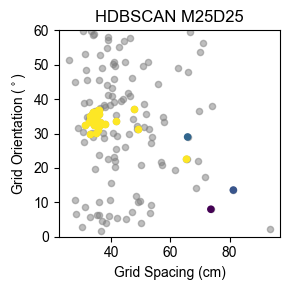

for module 0, there are 4 cells with average spacing 71.56271019387381
for module 1, there are 30 cells with average spacing 35.57931388380197
last_ephys_bin 21800
last_ephys_time_bin 1807.255
module 1 contains cells from ['VISp2/3' 'VISpl2/3' 'VISpl4' 'VISpl5']
module 0 contains cells from ['VISpl4' 'VISpl5']
25 25
for module 1, there are 24 cells
for module 0, there are 3 cells
last_ephys_bin 21800
last_ephys_time_bin 1807.255


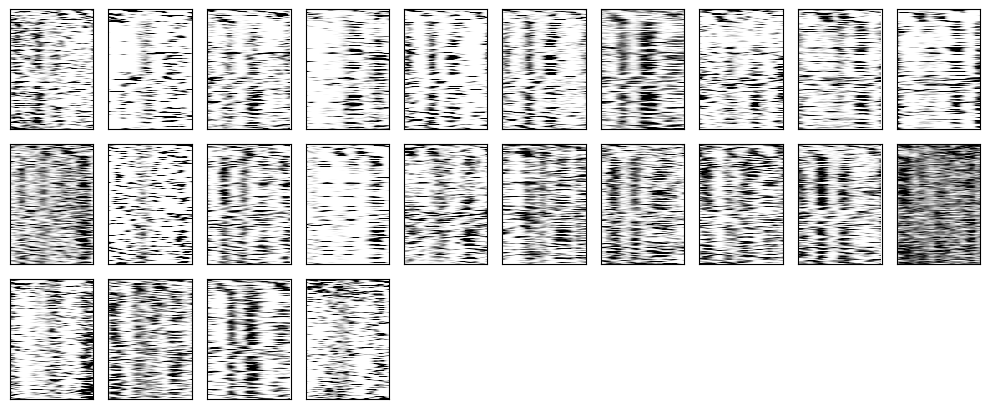

last_ephys_bin 21800
last_ephys_time_bin 1807.255


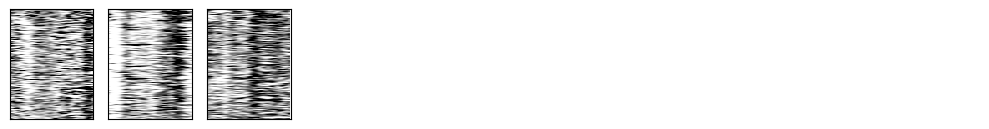

last_ephys_bin 21800
last_ephys_time_bin 1807.255


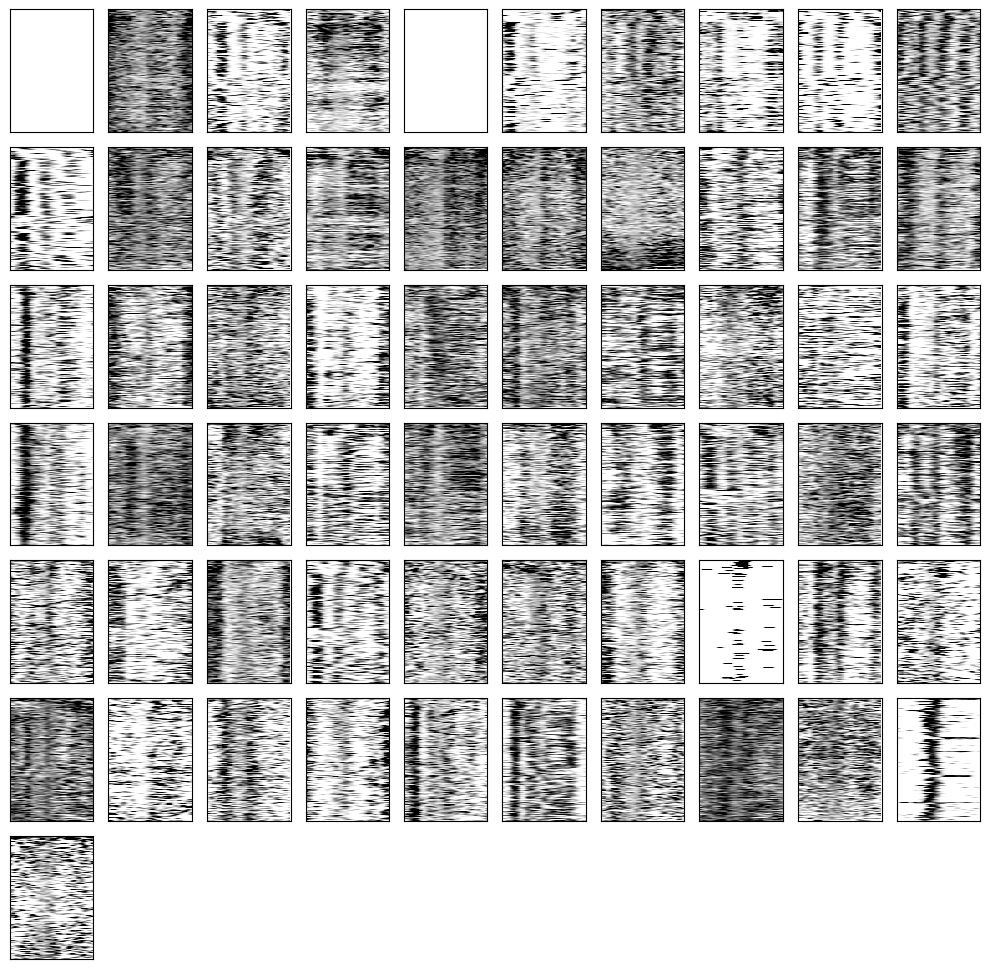

last_ephys_bin 21800
last_ephys_time_bin 1807.255


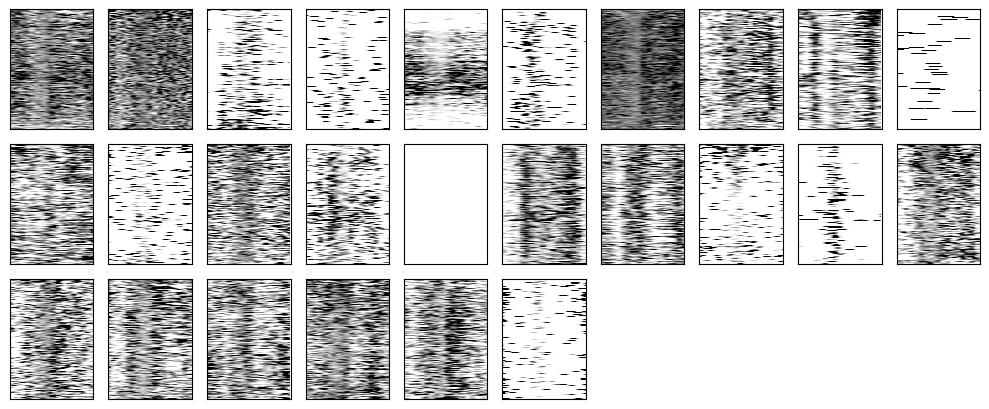

last_ephys_bin 21800
last_ephys_time_bin 1807.255


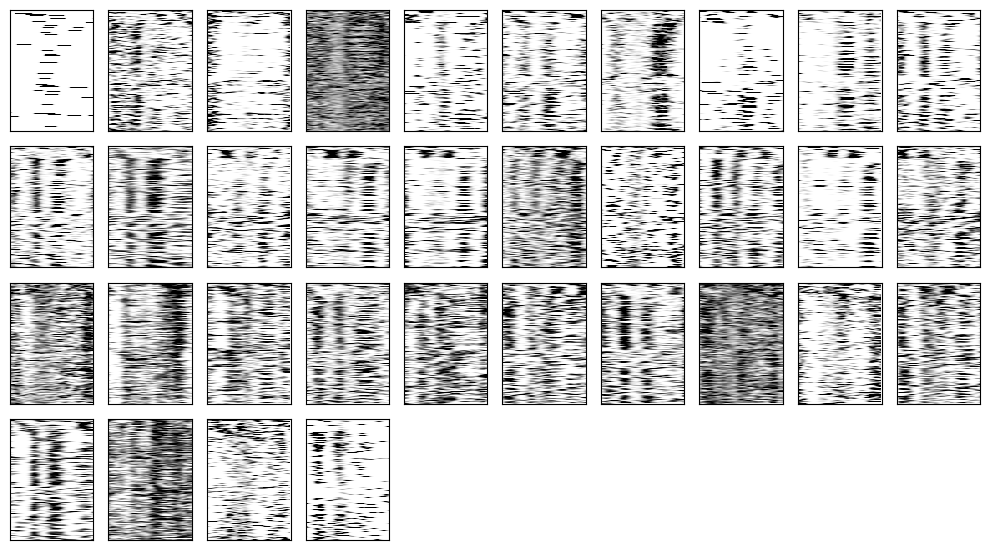

last_ephys_bin 21800
last_ephys_time_bin 1807.255


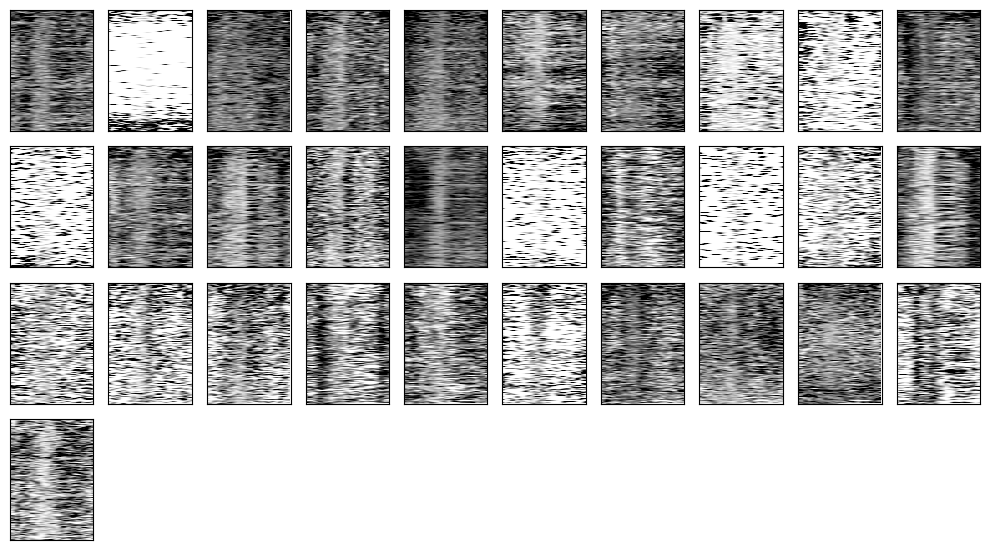

In [64]:
gcs, ngs, ns, sc, ngs_ns, all = cell_classification_of1(mouse, day, percentile_threshold=99) # subset
rc, rsc, vr_ns = cell_classification_vr(mouse, day)

g_m_ids, g_m_cluster_ids = HDBSCAN_grid_modules(gcs, all, mouse, day, min_cluster_size=3, cluster_selection_epsilon=3, 
                                                figpath=fig_path, curate_with_vr=True, curate_with_brain_region=True) # create grid modules using HDBSCAN    

plot_grid_modules_rate_maps(gcs, g_m_ids, g_m_cluster_ids, mouse, day, figpath=fig_path)

# we now have cluster ids classified into modules, non grid spatial cells and non spatial cells 
# as defined by activity in the open field
g_m_cluster_ids = sorted(g_m_cluster_ids, key=len, reverse=True) 
cluster_ids_by_group = []
cluster_ids_by_group.extend(g_m_cluster_ids) # grid cells by module [0,1,2...]
cluster_ids_by_group.append(ngs.cluster_id.values.tolist()) # non grid spatial [-4]
cluster_ids_by_group.append(ns.cluster_id.values.tolist()) # non spatial cells [-3]
cluster_ids_by_group.append(gcs.cluster_id.values.tolist()) # all grid cells [-2]
cluster_ids_by_group.append(sc.cluster_id.values.tolist()) # speed cells [-1]

for m, cluster_ids in enumerate(cluster_ids_by_group):
    plot_vr_rate_maps(mouse, day, cluster_ids, label=f'{m}', figpath=fig_path)

#plot_vr_rate_maps(mouse, day, rc.cluster_id.values, label=f'ramp_cells', figpath=fig_path)
#plot_vr_rate_maps(mouse, day, rsc.cluster_id.values, label=f'speed_ramp_cells', figpath=fig_path)

last_ephys_bin 21800
last_ephys_time_bin 1807.255


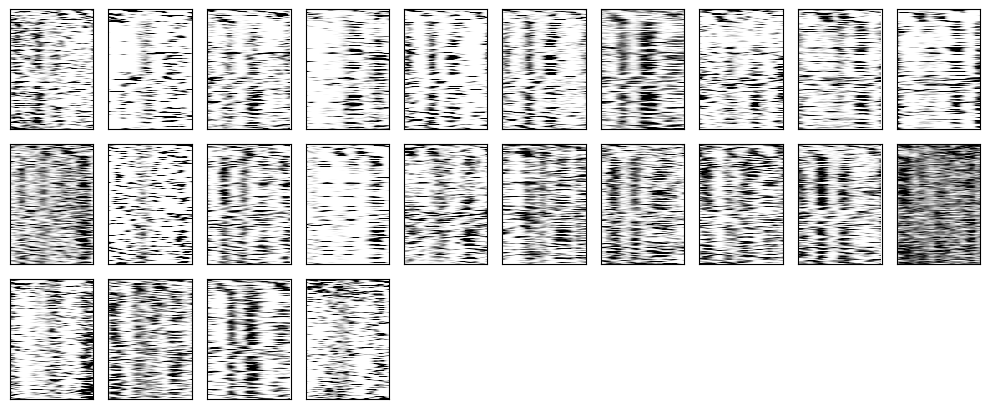

In [4]:
cluster_ids=cluster_ids_by_group[0]
tcs,tcs_time,_,_,_,_ = compute_vr_tcs(mouse, day)
ncols = 10
nrows = int(np.ceil(len(cluster_ids)/ncols))
fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(10, 1.4*nrows), squeeze=False)
counter = 0
for j in range(nrows):
    for i in range(ncols):
        if counter<len(cluster_ids):
            index = cluster_ids[counter]
            plot_firing_rate_map(ax[j, i], 
                                zscore(tcs[index]),
                                bs=bs,
                                tl=tl,
                                p=95)
        else:
            ax[j, i].axis('off')
        counter+=1
        ax[j, i].set_xticks([])
        ax[j, i].set_yticks([])
        ax[j, i].xaxis.set_tick_params(labelbottom=False)
        ax[j, i].yaxis.set_tick_params(labelleft=False)
plt.tight_layout()
plt.show()

3, x=-3000.0, y=2186.037271958004


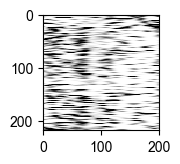

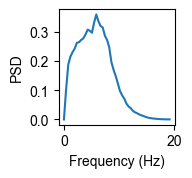

71, x=-3210.0, y=2186.0172864958654


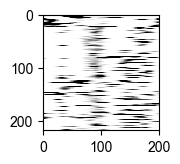

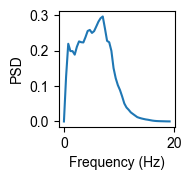

72, x=-3210.0, y=2201.015111808252


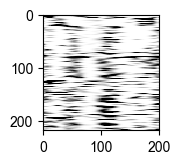

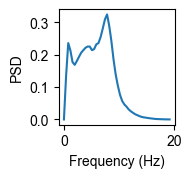

79, x=-3210.0, y=2171.01946118348


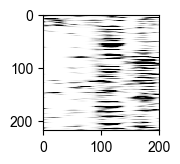

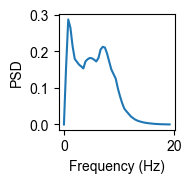

83, x=-3210.0, y=2171.01946118348


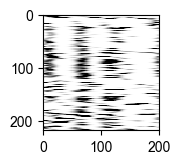

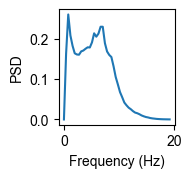

87, x=-3210.0, y=2141.0238105587086


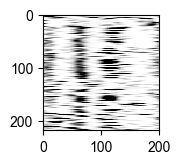

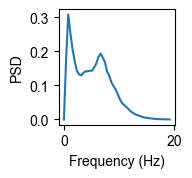

91, x=-3210.0, y=2111.0281599339373


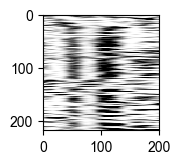

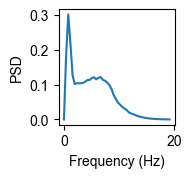

96, x=-3210.0, y=2081.032509309166


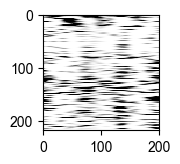

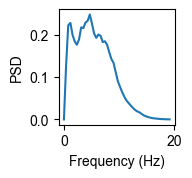

101, x=-3210.0, y=2066.03468399678


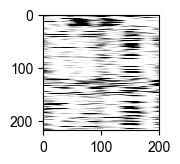

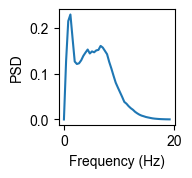

104, x=-3210.0, y=2051.0368586843947


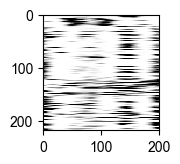

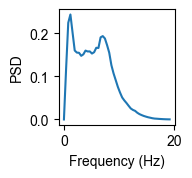

105, x=-3210.0, y=2036.0390333720088


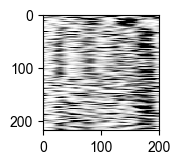

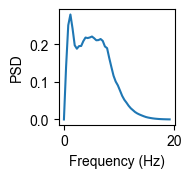

106, x=-3210.0, y=2051.0368586843947


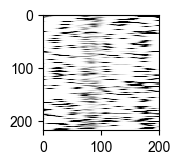

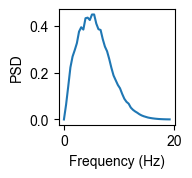

110, x=-3210.0, y=2021.041208059624


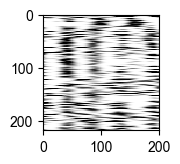

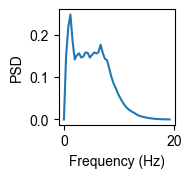

111, x=-3210.0, y=2021.041208059624


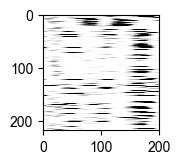

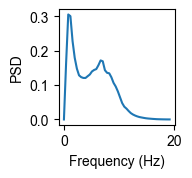

120, x=-3210.0, y=1946.0520814976949


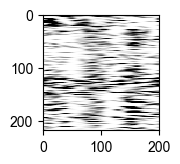

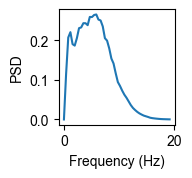

206, x=-3420.0, y=2056.314199574445


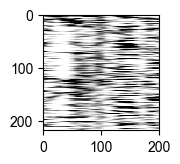

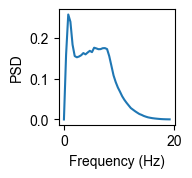

215, x=-3420.0, y=2011.3198969238208


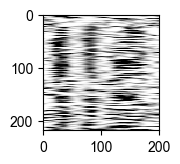

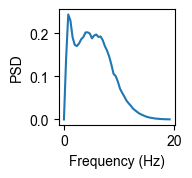

230, x=-3420.0, y=1921.331291622572


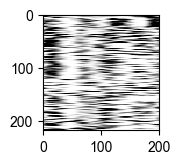

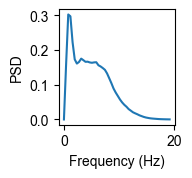

231, x=-3420.0, y=1921.331291622572


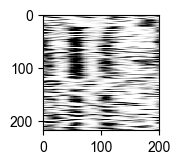

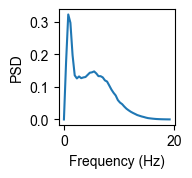

232, x=-3420.0, y=1936.329392506113


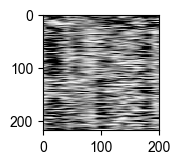

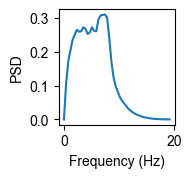

233, x=-3420.0, y=1936.329392506113


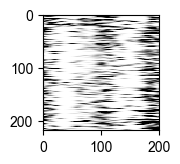

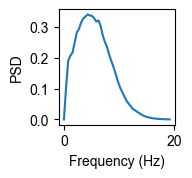

234, x=-3420.0, y=1921.331291622572


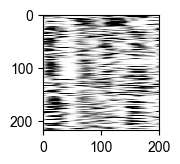

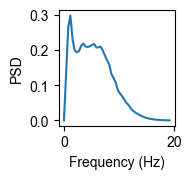

235, x=-3420.0, y=1936.329392506113


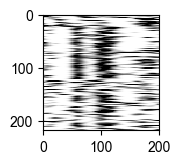

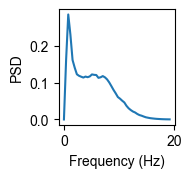

250, x=-3420.0, y=1816.344585437781


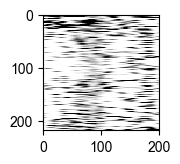

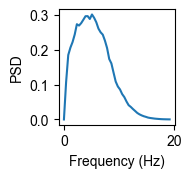

In [5]:
from scipy.signal import welch

for id in cluster_ids:
    cluster = all[all.cluster_id == id]
    print(f'{cluster.cluster_id.iloc[0]}, x={cluster.SC_x.iloc[0]}, y={cluster.SC_y.iloc[0]}')
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(1.5,1.5), squeeze=False)
    plot_firing_rate_map(ax[0,0], zscore(tcs[id]), bs=bs, tl=tl, p=95)
    plt.show()

    frequencies, psd = welch(tcs_time[id], fs=int(1000/time_bs))
    fig, ax = plt.subplots(figsize=(1.5, 1.5))
    ax.plot(frequencies[:50], psd[:50]*frequencies[:50])
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('PSD')
    plt.show()



2, x=-3000.0, y=2186.037271958004


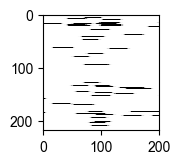

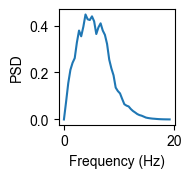

3, x=-3000.0, y=2186.037271958004


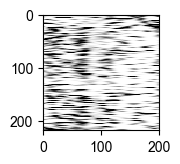

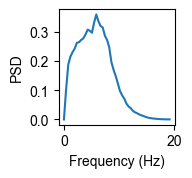

11, x=-3000.0, y=2156.037514476223


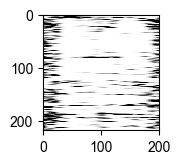

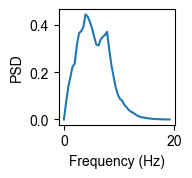

15, x=-3000.0, y=2126.0377569944426


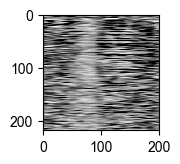

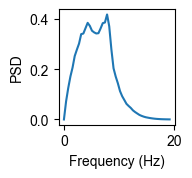

71, x=-3210.0, y=2186.0172864958654


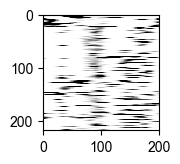

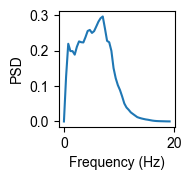

72, x=-3210.0, y=2201.015111808252


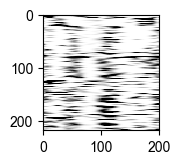

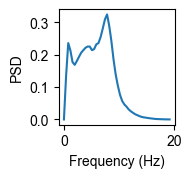

73, x=-3210.0, y=2201.015111808252


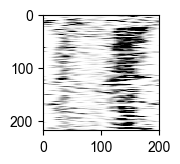

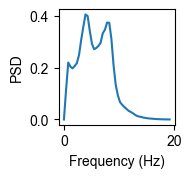

76, x=-3210.0, y=2156.021635871094


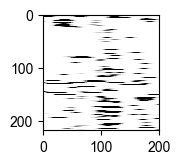

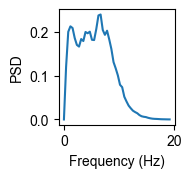

79, x=-3210.0, y=2171.01946118348


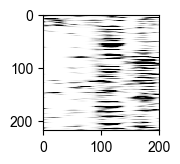

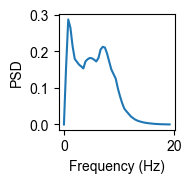

83, x=-3210.0, y=2171.01946118348


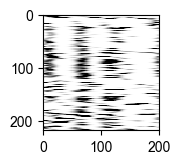

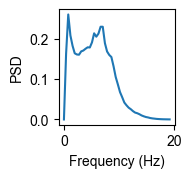

87, x=-3210.0, y=2141.0238105587086


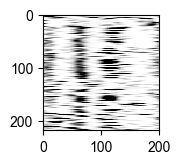

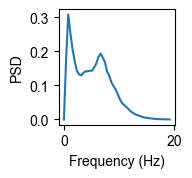

91, x=-3210.0, y=2111.0281599339373


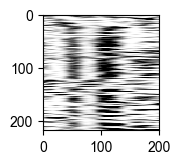

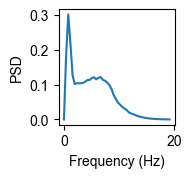

96, x=-3210.0, y=2081.032509309166


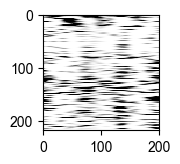

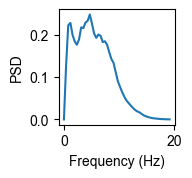

101, x=-3210.0, y=2066.03468399678


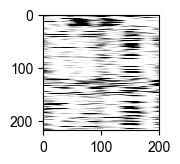

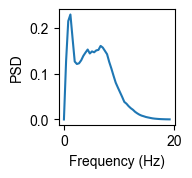

104, x=-3210.0, y=2051.0368586843947


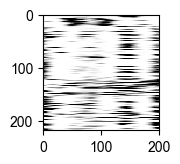

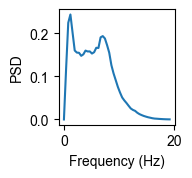

105, x=-3210.0, y=2036.0390333720088


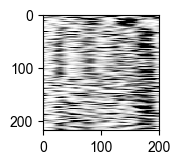

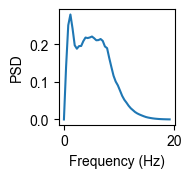

106, x=-3210.0, y=2051.0368586843947


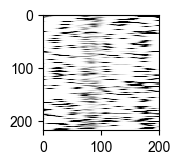

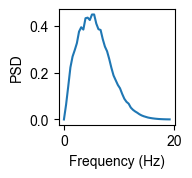

110, x=-3210.0, y=2021.041208059624


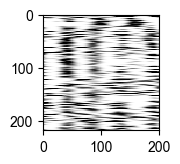

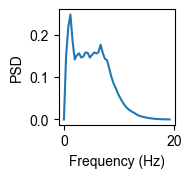

111, x=-3210.0, y=2021.041208059624


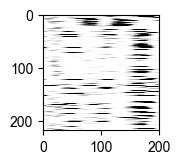

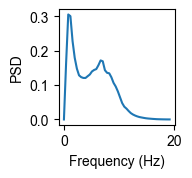

120, x=-3210.0, y=1946.0520814976949


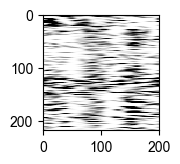

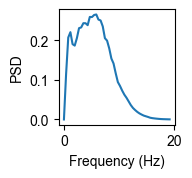

169, x=-3420.0, y=2236.2914101769434


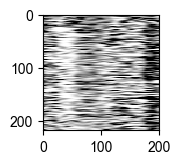

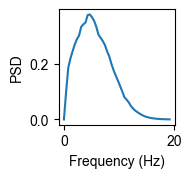

196, x=-3420.0, y=2101.30850222507


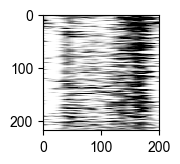

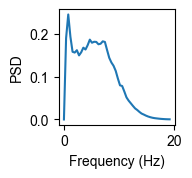

206, x=-3420.0, y=2056.314199574445


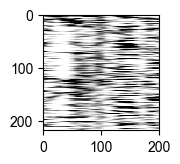

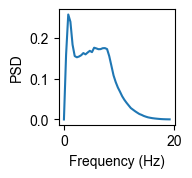

215, x=-3420.0, y=2011.3198969238208


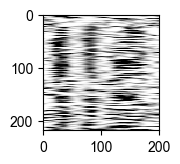

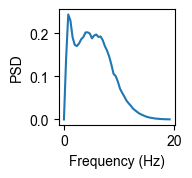

219, x=-3420.0, y=2011.3198969238208


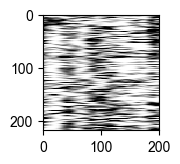

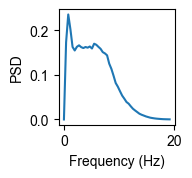

230, x=-3420.0, y=1921.331291622572


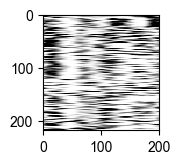

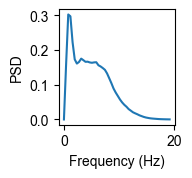

231, x=-3420.0, y=1921.331291622572


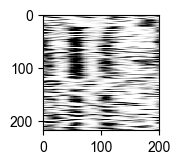

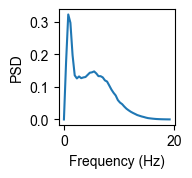

232, x=-3420.0, y=1936.329392506113


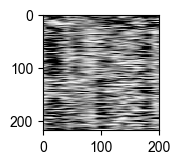

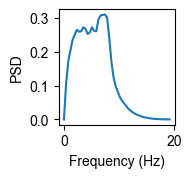

233, x=-3420.0, y=1936.329392506113


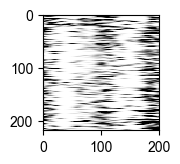

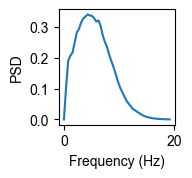

234, x=-3420.0, y=1921.331291622572


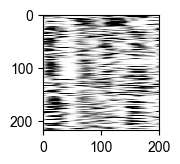

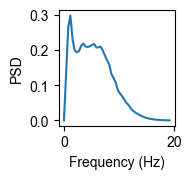

235, x=-3420.0, y=1936.329392506113


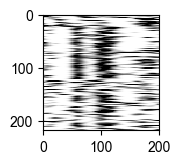

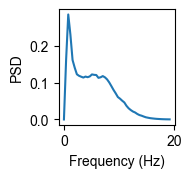

241, x=-3420.0, y=1906.3331907390304


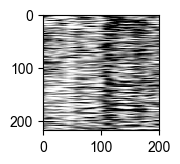

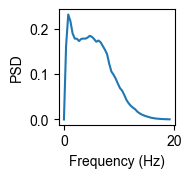

250, x=-3420.0, y=1816.344585437781


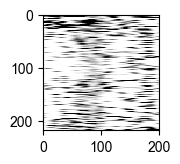

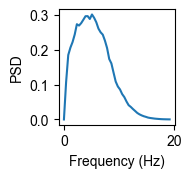

264, x=-3420.0, y=1696.359778369449


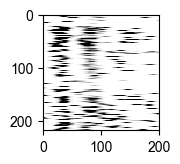

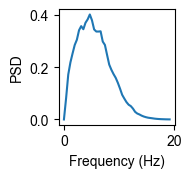

In [6]:
from scipy.signal import welch

for id in gcs.cluster_id:
    cluster = all[all.cluster_id == id]
    print(f'{cluster.cluster_id.iloc[0]}, x={cluster.SC_x.iloc[0]}, y={cluster.SC_y.iloc[0]}')
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(1.5,1.5), squeeze=False)
    plot_firing_rate_map(ax[0,0], zscore(tcs[id]), bs=bs, tl=tl, p=95)
    plt.show()

    frequencies, psd = welch(tcs_time[id], fs=int(1000/time_bs))
    fig, ax = plt.subplots(figsize=(1.5, 1.5))
    ax.plot(frequencies[:50], psd[:50]*frequencies[:50])
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('PSD')
    plt.show()



In [7]:
len(gcs)

34

/Users/harryclark/Downloads/kilosort4_sa


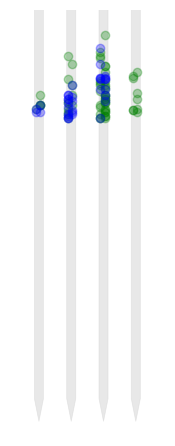

In [8]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(2, 8), squeeze=False)
plot_NP2_probe(ax[0,0], sorting_analyzer_path='/Users/harryclark/Downloads/kilosort4_sa')
ax[0,0].scatter(ngs['probe_x'], ngs['probe_y'], color='green', alpha=0.3)
ax[0,0].scatter(gcs['probe_x'], gcs['probe_y'], color='blue', alpha=0.3)
plt.show()

pick 2 interesting grid cells to use 

In [9]:
tcs, tcs_time, _, last_ephys_bin, beh, clusters = compute_vr_tcs(mouse,day, apply_zscore=False, apply_guassian_filter=False)

last_ephys_time_bin = clusters[clusters.index[0]].count(bin_size=time_bs, time_units = 'ms').index[-1]

# time binned variables for later
ep = nap.IntervalSet(start=0, end=last_ephys_time_bin, time_units = 's')
speed_in_time = np.array(beh['S'].bin_average(bin_size=time_bs, time_units = 'ms', ep=ep))
dt_in_time = np.array(beh['travel'].bin_average(bin_size=time_bs, time_units = 'ms', ep=ep)-((beh['trial_number'][0]-1)*tl))
pos_in_time = dt_in_time%tl
trial_number_in_time = (dt_in_time//tl)+beh['trial_number'][0]

if np.any(np.isnan(pos_in_time)):
    series = pd.Series(dt_in_time)
    filled_series = series.ffill().bfill()
    dt_in_time = np.array(filled_series)
    pos_in_time = dt_in_time%tl
    trial_number_in_time = (dt_in_time//tl)+beh['trial_number'][0]

if np.any(np.isnan(speed_in_time)):
    series = pd.Series(speed_in_time)
    filled_series = series.ffill().bfill()
    speed_in_time = np.array(speed_in_time)

last_ephys_bin 21800
last_ephys_time_bin 1807.255


In [31]:
gc_id1 = cluster_ids_by_group[0][9]
gc_id2 = cluster_ids_by_group[0][10]
distal_id = 175

y1 = np.array(tcs_time[gc_id1])
y2 = np.array(tcs_time[gc_id2])
y3 = np.array(tcs_time[distal_id])

X  = np.stack([pos_in_time, speed_in_time]).T
X1 = np.stack([pos_in_time, speed_in_time, y1]).T
X2 = np.stack([pos_in_time, speed_in_time, y2]).T

In [11]:
time_bs

10

In [12]:
xgb_history = MLencoding(tunemodel = 'xgboost',
                         cov_history = True, spike_history=True, # We can choose!
                         window = time_bs, #this dataset has 100ms time bins
                         n_filters = 5,
                         max_time = 1000)

Y_hat, pR2_cv = xgb_history.fit_cv(X, y1, verbose = 2, continuous_folds = True)

...runnning cv-fold 0 of 10
pR2:  0.24535735209167775
...runnning cv-fold 1 of 10
pR2:  0.2295752364394975
...runnning cv-fold 2 of 10
pR2:  0.32740665038605454
...runnning cv-fold 3 of 10
pR2:  0.26367966050236036
...runnning cv-fold 4 of 10
pR2:  0.2722348531868096
...runnning cv-fold 5 of 10
pR2:  0.2428938983156259
...runnning cv-fold 6 of 10
pR2:  0.21552876757920925
...runnning cv-fold 7 of 10
pR2:  0.22039379832215045
...runnning cv-fold 8 of 10
pR2:  0.26941495374574664
...runnning cv-fold 9 of 10
pR2:  0.14945264027443794
pR2_cv: 0.243594 (+/- 0.013894)


plot to see if the true time binned spikes aligns with the prediction of the model

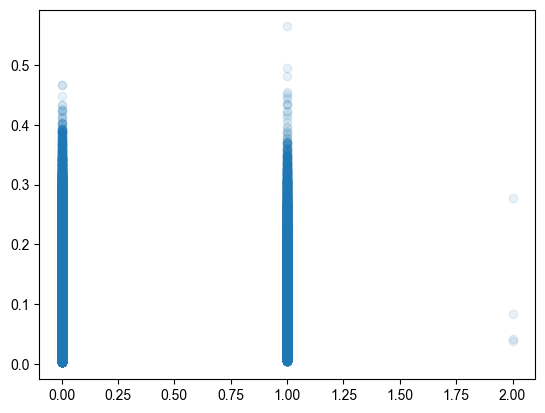

In [13]:
plt.scatter(y1, Y_hat, alpha=0.1)
plt.show()

plot the rate maps for true space binned, true time binned and predicted time binned data

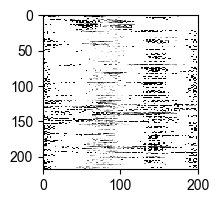

In [28]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(2, 2), squeeze=False)
plot_firing_rate_map(ax[0,0], zscore(tcs[gc_id1]), bs=bs, tl=tl, p=95)
plt.show()

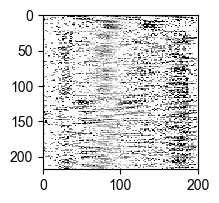

In [29]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(2, 2), squeeze=False)
plot_firing_rate_map(ax[0,0], zscore(tcs[gc_id2]), bs=bs, tl=tl, p=95)
plt.show()

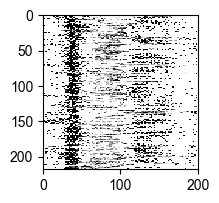

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(2, 2), squeeze=False)
plot_firing_rate_map(ax[0,0], zscore(tcs[distal_id]), bs=bs, tl=tl, p=95)
plt.show()

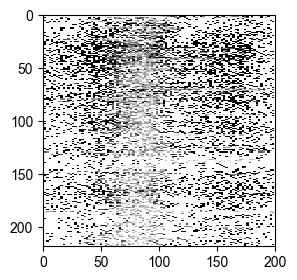

In [17]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(3, 3), squeeze=False)
plot_firing_rate_map(ax[0,0], zscore(tcs[16]), bs=bs, tl=tl, p=95)
plt.show()

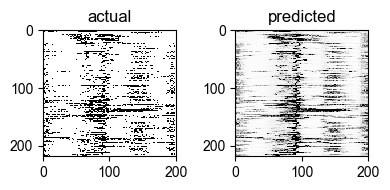

In [18]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(4, 2), squeeze=False)
tc, _ = np.histogram(dt_in_time, weights=y1, bins=last_ephys_bin, range=(0, bs*last_ephys_bin))
plot_firing_rate_map(ax[0,0], zscore(tc), bs=bs, tl=tl, p=95)
tc, _ = np.histogram(dt_in_time, weights=Y_hat, bins=last_ephys_bin, range=(0, bs*last_ephys_bin))
plot_firing_rate_map(ax[0,1], zscore(tc), bs=bs, tl=tl, p=95)
ax[0,0].set_title(f'actual')
ax[0,1].set_title(f'predicted')
plt.tight_layout()
plt.show()

we want to evaluate the effect of the history parameter. Here we will increase the number of time bins available to the sample
and plot this as a function of model performance

In [19]:
nbins_history = np.append(np.append(np.array([5,6,7,8,9,10]), np.arange(10,100,20)), np.arange(100,501, 100))


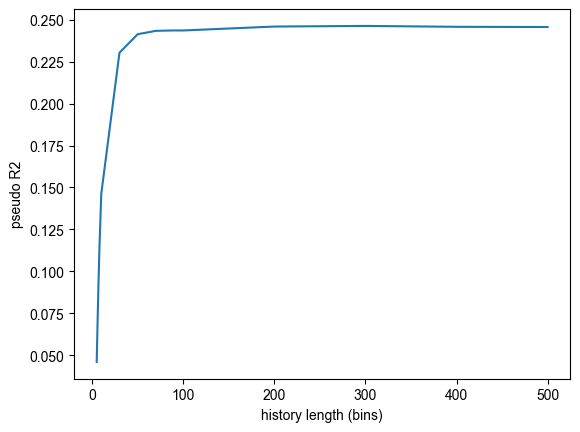

In [20]:
pR2s = []
for nbins in nbins_history:
    xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=True, 
                             window = time_bs, n_filters = 5, max_time = int(time_bs*nbins))
    Y_hat, pR2_cv = xgb_history.fit_cv(X, y1, verbose = 0, continuous_folds = True)
    pR2s.append(np.nanmean(pR2_cv))
plt.plot(nbins_history, pR2s)
plt.xlabel('history length (bins)')
plt.ylabel('pseudo R2')
plt.show()

set the coviarate history to false and the spike history to true. This is only testing prediction using the cells own history

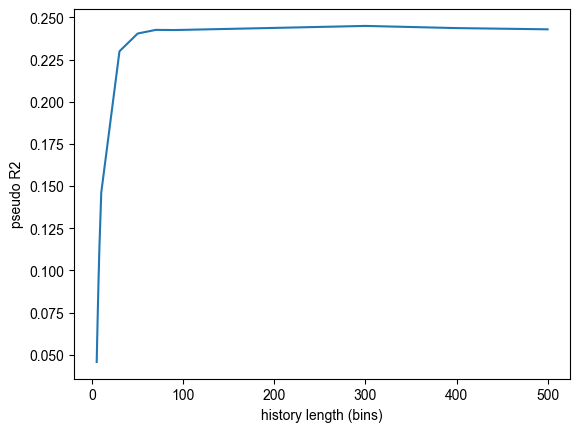

In [21]:
pR2s = []
for nbins in nbins_history:
    xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = False, spike_history=True, 
                             window = time_bs, n_filters = 5, max_time = int(time_bs*nbins))
    Y_hat, pR2_cv = xgb_history.fit_cv(X, y1, verbose = 0, continuous_folds = True)
    pR2s.append(np.nanmean(pR2_cv))
plt.plot(nbins_history, pR2s)
plt.xlabel('history length (bins)')
plt.ylabel('pseudo R2')
plt.show()

set the spike history to false and the cov history to true, this is now only using spike data from the other cell

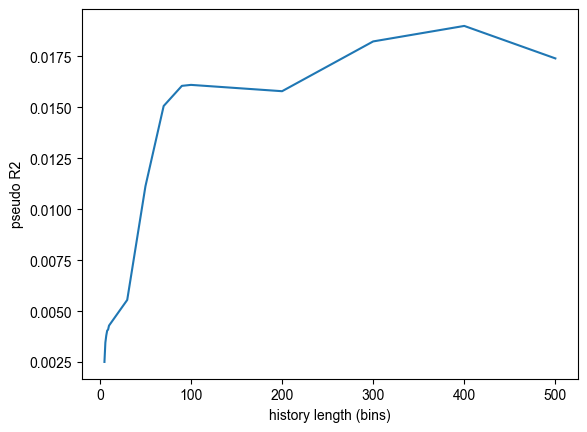

In [22]:
pR2s = []
for nbins in nbins_history:
    xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=False, 
                             window = time_bs, n_filters = 5, max_time = int(time_bs*nbins))
    Y_hat, pR2_cv = xgb_history.fit_cv(y2, y1, verbose = 0, continuous_folds = True)
    pR2s.append(np.nanmean(pR2_cv))
plt.plot(nbins_history, pR2s)
plt.xlabel('history length (bins)')
plt.ylabel('pseudo R2')
plt.show()

set the spike history to false and the cov history to true, We will now look at the effect of using covariate history from a cell with a very distal connection (such as in the cerebellum)

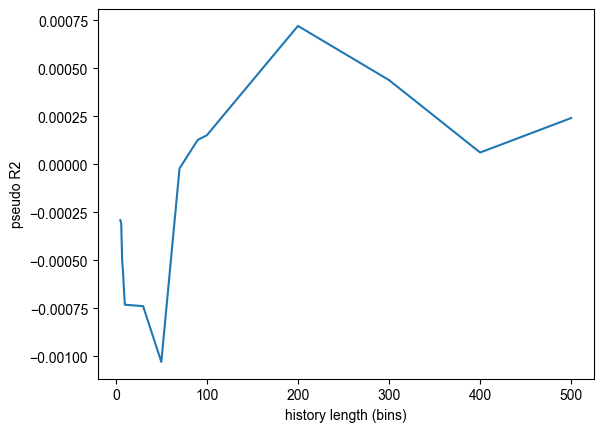

In [33]:
pR2s = []
for nbins in nbins_history:
    xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=False, 
                             window = time_bs, n_filters = 5, max_time = int(time_bs*nbins))
    Y_hat, pR2_cv = xgb_history.fit_cv(y3, y1, verbose = 0, continuous_folds = True)
    pR2s.append(np.nanmean(pR2_cv))
plt.plot(nbins_history, pR2s)
plt.xlabel('history length (bins)')
plt.ylabel('pseudo R2')
plt.show()

It looks like for a number of different runs, providing a spike history of 40 time bins is optimal for model performance.

Now we're going to test model performance by dropping out n numbers of grid cells from a covariate history and see how the number of comodular grid cells improves the prediction of a held out grid cell.

In [ ]:
test_grid_cell = cluster_ids_by_group[0][9]
grid_module_population_cluster_id_minus_test_grid_cells = cluster_ids_by_group[0].copy()
grid_module_population_cluster_id_minus_test_grid_cells.remove(test_grid_cell)
x_grid_module = {cluster_id: tcs_time[cluster_id] for cluster_id in grid_module_population_cluster_id_minus_test_grid_cells if cluster_id in tcs_time}

all_x = np.vstack(list(x_grid_module.values())).T
y_g = np.array(tcs_time[test_grid_cell])
y_ng = np.array(tcs_time[distal_id])

n_neurons = np.arange(1, all_x.shape[1]+1, 2)
iterations = 2
ntime_bins = 5
nfilters = 5


pR2s_g = np.zeros((len(n_neurons), iterations))
pR2s_ng = np.zeros((len(n_neurons), iterations))
for j, n in enumerate(n_neurons):
    print(f'I am going to use only {n} grid cells')
    reps = []
    for i in range(iterations):
        # real data
        xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=False, 
                             window = time_bs, n_filters = nfilters, max_time = 1000)
        np.random.seed(i)
        idx = np.random.choice(np.arange(0,all_x.shape[1]), n, replace=False)
        x = all_x[:, idx]
        Y_hat, pR2_cv = xgb_history.fit_cv(x, y_g, verbose = 0, continuous_folds = True)
        pR2s_g[j, i] = np.nanmean(pR2_cv)
        print(f'pR2_cv = {np.nanmean(pR2_cv)}')

        Y_hat, pR2_cv = xgb_history.fit_cv(x, y_ng, verbose = 0, continuous_folds = True)
        pR2s_ng[j, i] = np.nanmean(pR2_cv)
        print(f'pR2_cv = {np.nanmean(pR2_cv)}')

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(2,2))
ax.plot(n_neurons, np.nanmean(pR2s_g, axis=1), color='blue', label='ref G')
ax.plot(n_neurons, np.nanmean(pR2s_ng, axis=1), color='green', label='ref NG')
ax.set_ylabel(f'pseudo R2')
ax.set_xlabel(f'n grid cells')
ax.legend()
plt.show()


I am going to use only 1 grid cells
pR2_cv = 0.012928627271895454
pR2_cv = 0.000455073960215524
pR2_cv = 0.016573841602603057
pR2_cv = 0.0019110544099827376
I am going to use only 3 grid cells
pR2_cv = 0.03156200607704572
pR2_cv = 0.01715124059971592
pR2_cv = 0.027955127237880895
pR2_cv = 0.007702212428420996
I am going to use only 5 grid cells
pR2_cv = 0.03848361534344506
pR2_cv = 0.020518873360830924
pR2_cv = 0.02971362969286904
pR2_cv = 0.016196397840641807
I am going to use only 7 grid cells
pR2_cv = 0.061392435946796206
pR2_cv = 0.021909594085721608
pR2_cv = 0.042163555965779156
pR2_cv = 0.02658765737140515
I am going to use only 9 grid cells
pR2_cv = 0.06921294058354395
pR2_cv = 0.0245087115257722
pR2_cv = 0.04391404540367527
pR2_cv = 0.02750374149452154
I am going to use only 11 grid cells
pR2_cv = 0.07211681182334191
pR2_cv = 0.025198751339015002
pR2_cv = 0.048940630223062574
pR2_cv = 0.03048658093005895
I am going to use only 13 grid cells
pR2_cv = 0.07258152729293006
pR2_cv =

In [65]:
non_grid_cell_population_cluster_ids_minus_test_ngs_cell = cluster_ids_by_group[-4].copy()
non_grid_cell_population_cluster_ids_minus_test_ngs_cell.remove(distal_id)
ngs_cells = {cluster_id: tcs_time[cluster_id] for cluster_id in non_grid_cell_population_cluster_ids_minus_test_ngs_cell if cluster_id in tcs_time}

all_x = np.vstack(list(ngs_cells.values())).T
y_g = np.array(tcs_time[test_grid_cell])
y_ng = np.array(tcs_time[distal_id])

n_neurons = np.arange(1, all_x.shape[1]+1, 2)
iterations = 2
ntime_bins = 5
nfilters = 5

pR2s_g = np.zeros((len(n_neurons), iterations))
pR2s_ng = np.zeros((len(n_neurons), iterations))
for j, n in enumerate(n_neurons):
    print(f'I am going to use only {n} non grid cells')
    reps = []
    for i in range(iterations):
        # real data
        xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=False, 
                             window = time_bs, n_filters = nfilters, max_time = 1000)
        np.random.seed(i)
        idx = np.random.choice(np.arange(0,all_x.shape[1]), n, replace=False)
        x = all_x[:, idx]
        Y_hat, pR2_cv = xgb_history.fit_cv(x, y_g, verbose = 0, continuous_folds = True)
        pR2s_g[j, i] = np.nanmean(pR2_cv)
        print(f'pR2_cv = {np.nanmean(pR2_cv)}')

        Y_hat, pR2_cv = xgb_history.fit_cv(x, y_ng, verbose = 0, continuous_folds = True)
        pR2s_ng[j, i] = np.nanmean(pR2_cv)
        print(f'pR2_cv = {np.nanmean(pR2_cv)}')

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(2,2))
ax.plot(n_neurons, np.nanmean(pR2s_g, axis=1), color='blue', label='ref G')
ax.plot(n_neurons, np.nanmean(pR2s_ng, axis=1), color='green', label='ref NG')
ax.set_ylabel(f'pseudo R2')
ax.set_xlabel(f'n non-grid cells')
ax.legend()
plt.show()

I am going to use only 1 non grid cells
pR2_cv = 0.00016280797045566952
pR2_cv = 0.0008926432636452208
pR2_cv = 0.0013159093147837586
pR2_cv = -0.0012147984779761866
I am going to use only 3 non grid cells
pR2_cv = 0.0013865135673985951
pR2_cv = 0.009712141312888122
pR2_cv = 0.011886360484888525
pR2_cv = 0.01195865084823059
I am going to use only 5 non grid cells
pR2_cv = 0.01482566465532118
pR2_cv = 0.01453087205500363
pR2_cv = 0.013561639658053116
pR2_cv = 0.015115731802756716
I am going to use only 7 non grid cells
pR2_cv = 0.021163594544281805
pR2_cv = 0.021772041439754575
pR2_cv = 0.016967224675126437
pR2_cv = 0.01906319364346055
I am going to use only 9 non grid cells
pR2_cv = 0.02949559435397564
pR2_cv = 0.03246003323461766
pR2_cv = 0.023298217706813305
pR2_cv = 0.027865465765654195
I am going to use only 11 non grid cells
pR2_cv = 0.029817960660277386
pR2_cv = 0.04116942789621808
pR2_cv = 0.024831923500283692
pR2_cv = 0.03159230188164473
I am going to use only 13 non grid cells

KeyboardInterrupt: 

repeat but now include position in the covariate history

I am going to use only 1 grid cells
pR2_cv = 0.031644021609587944
pR2_cv = 0.00845034832761118
pR2_cv = 0.05119150085423975
pR2_cv = 0.041048709507614536
pR2_cv = 0.016449782832971594
pR2_cv = 0.052560809747160486
I am going to use only 4 grid cells
pR2_cv = 0.04894529290048494
pR2_cv = 0.020411822458264728
pR2_cv = 0.05947349979361286
pR2_cv = 0.047369146291338274
pR2_cv = 0.021895819373994783
pR2_cv = 0.055853310199784054
I am going to use only 7 grid cells
pR2_cv = 0.07041395724610103
pR2_cv = 0.03160488927484913
pR2_cv = 0.05905201867664213
pR2_cv = 0.055218486118497244
pR2_cv = 0.02972301808254908
pR2_cv = 0.0613485797521595
I am going to use only 10 grid cells
pR2_cv = 0.07821462181957899
pR2_cv = 0.03592645134735931
pR2_cv = 0.05940159630481948
pR2_cv = 0.05646406321730152
pR2_cv = 0.028424478143430708
pR2_cv = 0.06309580017120696
I am going to use only 13 grid cells
pR2_cv = 0.07868728837947077
pR2_cv = 0.03791083095482893
pR2_cv = 0.059303923170964154
pR2_cv = 0.05987458773354

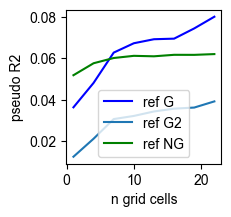

In [93]:
grid_module_population_cluster_id_minus_test_grid_cells = cluster_ids_by_group[0].copy()
grid_module_population_cluster_id_minus_test_grid_cells.remove(gc_id1)
grid_module_population_cluster_id_minus_test_grid_cells.remove(gc_id2)
x_grid_module = {cluster_id: tcs_time[cluster_id] for cluster_id in grid_module_population_cluster_id_minus_test_grid_cells if cluster_id in tcs_time}

all_x = np.vstack(list(x_grid_module.values())).T
y_g = np.array(tcs_time[gc_id1])
y_g2 = np.array(tcs_time[gc_id2])
y_ng = np.array(tcs_time[distal_id])

n_neurons = np.arange(1, all_x.shape[1]+1, 3)
iterations = 2
ntime_bins = 5
nfilters = 5

pR2s_g = np.zeros((len(n_neurons), iterations))
pR2s_g2 = np.zeros((len(n_neurons), iterations))
pR2s_ng = np.zeros((len(n_neurons), iterations))
for j, n in enumerate(n_neurons):
    print(f'I am going to use only {n} grid cells')
    reps = []
    for i in range(iterations):
        # real data
        xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=False, 
                             window = time_bs, n_filters = nfilters, max_time = 1000)
        np.random.seed(i)
        idx = np.random.choice(np.arange(0,all_x.shape[1]), n, replace=False)
        x = all_x[:, idx]

        # add position to the covariate history as well
        x = np.column_stack((pos_in_time, x))

        Y_hat, pR2_cv = xgb_history.fit_cv(x, y_g, verbose = 0, continuous_folds = True)
        pR2s_g[j, i] = np.nanmean(pR2_cv)
        print(f'pR2_cv = {np.nanmean(pR2_cv)}')

        Y_hat, pR2_cv = xgb_history.fit_cv(x, y_g2, verbose = 0, continuous_folds = True)
        pR2s_g2[j, i] = np.nanmean(pR2_cv)
        print(f'pR2_cv = {np.nanmean(pR2_cv)}')

        Y_hat, pR2_cv = xgb_history.fit_cv(x, y_ng, verbose = 0, continuous_folds = True)
        pR2s_ng[j, i] = np.nanmean(pR2_cv)
        print(f'pR2_cv = {np.nanmean(pR2_cv)}')

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(2,2))
ax.plot(n_neurons, np.nanmean(pR2s_g, axis=1), color='blue', label='ref G')
ax.plot(n_neurons, np.nanmean(pR2s_g2, axis=1), color='tab:blue', label='ref G2')
ax.plot(n_neurons, np.nanmean(pR2s_ng, axis=1), color='green', label='ref NG')
ax.set_ylabel(f'pseudo R2')
ax.set_xlabel(f'n grid cells')
ax.legend()
plt.show()


I am going to use only 1 non grid cells
pR2_cv = 0.02068873594620898
pR2_cv = 0.0003016423949728897
pR2_cv = 0.049840755150729124
pR2_cv = 0.021086503131827018
pR2_cv = 0.003709869206734795
pR2_cv = 0.0507414493875152
I am going to use only 6 non grid cells
pR2_cv = 0.03381715215757915
pR2_cv = 0.011029142654596069
pR2_cv = 0.05634450028061494
pR2_cv = 0.03089003530947032
pR2_cv = 0.011226754731670518
pR2_cv = 0.055720191568922064
I am going to use only 11 non grid cells
pR2_cv = 0.03913591302910985
pR2_cv = 0.01605257386447857
pR2_cv = 0.06394998487851225
pR2_cv = 0.03594451957179047
pR2_cv = 0.01356434111446132
pR2_cv = 0.05896102652053098
I am going to use only 16 non grid cells
pR2_cv = 0.04544874145714169
pR2_cv = 0.018044055239974398
pR2_cv = 0.06528733357808862
pR2_cv = 0.05465871512959476
pR2_cv = 0.01980408470714957
pR2_cv = 0.059092249707583436
I am going to use only 21 non grid cells
pR2_cv = 0.05993019455452662
pR2_cv = 0.023800515076744556
pR2_cv = 0.07340954113856846
pR2_

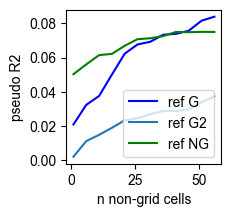

In [92]:
non_grid_cell_population_cluster_ids_minus_test_ngs_cell = cluster_ids_by_group[-4].copy()
non_grid_cell_population_cluster_ids_minus_test_ngs_cell.remove(distal_id)
ngs_cells = {cluster_id: tcs_time[cluster_id] for cluster_id in non_grid_cell_population_cluster_ids_minus_test_ngs_cell if cluster_id in tcs_time}

all_x = np.vstack(list(ngs_cells.values())).T
y_g = np.array(tcs_time[gc_id1])
y_g2 = np.array(tcs_time[gc_id2])
y_ng = np.array(tcs_time[distal_id])

n_neurons = np.arange(1, all_x.shape[1]+1, 5)
iterations = 2
ntime_bins = 5
nfilters = 5

pR2s_g = np.zeros((len(n_neurons), iterations))
pR2s_g2 = np.zeros((len(n_neurons), iterations))
pR2s_ng = np.zeros((len(n_neurons), iterations))
for j, n in enumerate(n_neurons):
    print(f'I am going to use only {n} non grid cells')
    reps = []
    for i in range(iterations):
        # real data
        xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=False, 
                             window = time_bs, n_filters = nfilters, max_time = 1000)
        np.random.seed(i)
        idx = np.random.choice(np.arange(0,all_x.shape[1]), n, replace=False)
        x = all_x[:, idx]

        # add position to the covariate history as well
        x = np.column_stack((pos_in_time, x))

        Y_hat, pR2_cv = xgb_history.fit_cv(x, y_g, verbose = 0, continuous_folds = True)
        pR2s_g[j, i] = np.nanmean(pR2_cv)
        print(f'pR2_cv = {np.nanmean(pR2_cv)}')

        Y_hat, pR2_cv = xgb_history.fit_cv(x, y_g2, verbose = 0, continuous_folds = True)
        pR2s_g2[j, i] = np.nanmean(pR2_cv)
        print(f'pR2_cv = {np.nanmean(pR2_cv)}')

        Y_hat, pR2_cv = xgb_history.fit_cv(x, y_ng, verbose = 0, continuous_folds = True)
        pR2s_ng[j, i] = np.nanmean(pR2_cv)
        print(f'pR2_cv = {np.nanmean(pR2_cv)}')

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(2,2))
ax.plot(n_neurons, np.nanmean(pR2s_g, axis=1), color='blue', label='ref G')
ax.plot(n_neurons, np.nanmean(pR2s_g2, axis=1), color='tab:blue', label='ref G2')
ax.plot(n_neurons, np.nanmean(pR2s_ng, axis=1), color='green', label='ref NG')
ax.set_ylabel(f'pseudo R2')
ax.set_xlabel(f'n non-grid cells')
ax.legend()
plt.show()

we will test the effect of adding n grid cells to the covariate history alongside position

the held out reference neuron may be a co modular grid cell, non co modular grid cell or a non grid cell


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]])

In [109]:
grid_module_population_cluster_ids = np.array(cluster_ids_by_group[0].copy())
grid_non_module_population_cluster_ids = np.setdiff1d(gcs.cluster_id.values, grid_module_population_cluster_ids).astype(int)
non_grid_population_cluster_ids = ngs.cluster_id.values.astype(int).astype(int)

pR2s_grids_comodular = np.zeros((len(n_neurons), len(grid_module_population_cluster_ids)))
pR2s_grids_non_comodular = np.zeros((len(n_neurons), len(grid_non_module_population_cluster_ids)))
pR2s_non_grids = np.zeros((len(n_neurons), len(non_grid_population_cluster_ids)))


In [115]:
pR2s_grids_comodular = np.zeros((len(n_neurons), len(grid_module_population_cluster_ids)))


In [116]:
pR2s_grids_comodular.shape

(5, 24)

In [120]:
grid_module_population_cluster_ids = np.array(cluster_ids_by_group[0].copy())
grid_non_module_population_cluster_ids = np.setdiff1d(gcs.cluster_id.values, grid_module_population_cluster_ids).astype(int)
non_grid_population_cluster_ids = ngs.cluster_id.values.astype(int).astype(int)

n_neurons = np.arange(1, len(grid_module_population_cluster_ids)+1, 5)

pR2s_grids_comodular = np.zeros((len(n_neurons), len(grid_module_population_cluster_ids)))
pR2s_grids_non_comodular = np.zeros((len(n_neurons), len(grid_non_module_population_cluster_ids)))
pR2s_non_grids = np.zeros((len(n_neurons), len(non_grid_population_cluster_ids)))

ntime_bins = 5
nfilters = 5

xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=False, 
                         window = time_bs, n_filters = nfilters, max_time = 1000)


for test_population_cluster_ids, pR2s, in zip([grid_module_population_cluster_ids, grid_non_module_population_cluster_ids, non_grid_population_cluster_ids],
                                              [pR2s_grids_comodular, pR2s_grids_non_comodular, pR2s_non_grids]):
    for j, n in enumerate(n_neurons):
        print(f'I am going to use only {n} grid cells')

        # loop over grid module population cluster ids
        for i, id in enumerate(test_population_cluster_ids):
            print(f'{np.sum(pR2s_grids_comodular!=0)}/{np.size(pR2s_grids_comodular)}, {np.sum(pR2s_grids_non_comodular!=0)}/{np.size(pR2s_grids_non_comodular)}, {np.sum(pR2s_non_grids!=0)}/{np.size(pR2s_non_grids)}')

            # create the covariate history and remove the test cell if necessary  
            cov_cluster_ids = grid_module_population_cluster_ids.copy()
            if id in cov_cluster_ids:
                cov_cluster_ids = np.setdiff1d(cov_cluster_ids, id)
            cov_tcs_time = {cluster_id: tcs_time[cluster_id] for cluster_id in cov_cluster_ids if cluster_id in tcs_time}
            all_x = np.vstack(list(cov_tcs_time.values())).T

            # sub select n cells to use in the covariate history
            np.random.seed(j)
            idx = np.random.choice(np.arange(0,all_x.shape[1]), n, replace=False)
            x = all_x[:, idx]
            
            # add position to the covariate history as well
            x = np.column_stack((pos_in_time, x))

            # get the target variable
            y = np.array(tcs_time[id])

            # fit the model
            Y_hat, pR2_cv = xgb_history.fit_cv(x, y, verbose = 0, continuous_folds = True)
            print(f'pR2_cv = {np.nanmean(pR2_cv)}')
            pR2s[j, i] = np.nanmean(pR2_cv)



I am going to use only 1 grid cells
0/120, 0/50, 0/305
pR2_cv = 0.055005038145610294
1/120, 0/50, 0/305
pR2_cv = 0.035846260108621096
2/120, 0/50, 0/305
pR2_cv = 0.06476007091846483
3/120, 0/50, 0/305
pR2_cv = 0.1154550362252392
4/120, 0/50, 0/305
pR2_cv = 0.12230784967411867
5/120, 0/50, 0/305
pR2_cv = 0.12913815645604254
6/120, 0/50, 0/305
pR2_cv = 0.04781702944814488
7/120, 0/50, 0/305
pR2_cv = 0.03434440023880059
8/120, 0/50, 0/305
pR2_cv = 0.03563441236314385
9/120, 0/50, 0/305
pR2_cv = 0.0852531492890973
10/120, 0/50, 0/305
pR2_cv = 0.03966962207690085
11/120, 0/50, 0/305
pR2_cv = 0.010090300811795872
12/120, 0/50, 0/305
pR2_cv = 0.04435731221433259
13/120, 0/50, 0/305
pR2_cv = 0.08444501466221395
14/120, 0/50, 0/305
pR2_cv = 0.012765425205005666
15/120, 0/50, 0/305
pR2_cv = 0.013998099979337642
16/120, 0/50, 0/305
pR2_cv = 0.04161845069956218
17/120, 0/50, 0/305
pR2_cv = 0.03436830059307895
18/120, 0/50, 0/305
pR2_cv = 0.07853050156199766
19/120, 0/50, 0/305
pR2_cv = 0.010899985

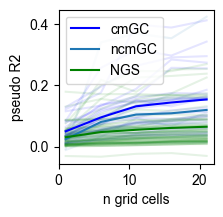

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(2,2))
#for i in range(len(grid_module_population_cluster_ids)):
#    ax.plot(n_neurons, pR2s_grids_comodular[:, i], color='blue', alpha=0.1)
#for i in range(len(grid_non_module_population_cluster_ids)):
#    ax.plot(n_neurons, pR2s_grids_non_comodular[:, i], color='tab:blue', alpha=0.1)
#for i in range(len(non_grid_population_cluster_ids)):
#    ax.plot(n_neurons, pR2s_non_grids[:, i], color='green', alpha=0.1)

ax.plot(n_neurons, np.nanmean(pR2s_grids_comodular, axis=1), color='blue', label='cmGC')
ax.fill_between(n_neurons, 
                np.nanmean(pR2s_grids_comodular, axis=1) - stats.sem(pR2s_grids_comodular, axis=1, nan_policy='omit'),
                np.nanmean(pR2s_grids_comodular, axis=1) + stats.sem(pR2s_grids_comodular, axis=1, nan_policy='omit'),
                color='blue', alpha=0.2)
ax.fill_between(n_neurons, 
                np.nanmean(pR2s_grids_non_comodular, axis=1) - stats.sem(pR2s_grids_non_comodular, axis=1, nan_policy='omit'),
                np.nanmean(pR2s_grids_non_comodular, axis=1) + stats.sem(pR2s_grids_non_comodular, axis=1, nan_policy='omit'),
                color='tab:blue', alpha=0.2)
ax.fill_between(n_neurons, 
                np.nanmean(pR2s_non_grids, axis=1) - stats.sem(pR2s_non_grids, axis=1, nan_policy='omit'),
                np.nanmean(pR2s_non_grids, axis=1) + stats.sem(pR2s_non_grids, axis=1, nan_policy='omit'),
                color='green', alpha=0.2)           
ax.plot(n_neurons, np.nanmean(pR2s_grids_non_comodular, axis=1), color='tab:blue', label='ncmGC')
ax.plot(n_neurons, np.nanmean(pR2s_non_grids, axis=1), color='green', label='NGS')
ax.set_ylabel(f'pseudo R2')
ax.set_xlabel(f'n grid cells')
ax.legend()
plt.show()


In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(2,2))
ax.plot(n_neurons, np.nanmean(pR2s_g, axis=1), color='blue', label='ref G')
ax.plot(n_neurons, np.nanmean(pR2s_g2, axis=1), color='tab:blue', label='ref G2')
ax.plot(n_neurons, np.nanmean(pR2s_ng, axis=1), color='green', label='ref NG')
ax.set_ylabel(f'pseudo R2')
ax.set_xlabel(f'n grid cells')
ax.legend()
plt.show()


we can clear see that any number of grid cells can beat the shuffle, but there is slowing of the plateau at around 5 grid cells

what happens if we try to predict the activity of a cell with the history of another cell, and do this for all combinations within a session?
We can sorted the clusters by ML position in this session because we are recording across all the shanks. 

First we will only use 50ms of history (5 time bins of 10 ms each). 

Then we will use 2 seconds of history (200 time bins of 10 ms each).

We'll take an example grid cell from above and test the predictabliltity against all other cells first before running every combination

In [ ]:
y = np.array(tcs_time[gc_id2])[:5000]

all = all.sort_values(by=['SC_x', 'SC_y'], ascending=[False, False])

nfilters = 5
pR2s_short_history = np.zeros(len(all))
pR2s_long_history = np.zeros(len(all))

done = 0
n_to_finish = len(all)

for i, id_i in enumerate(all.cluster_id):
    x = np.array(tcs_time[id_i])[:5000]

    xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=False, 
                                window = time_bs, n_filters = nfilters, max_time = 50)
    Y_hat, pR2_cv = xgb_history.fit_cv(x, y, verbose = 0, continuous_folds = True)
    pR2s_short_history[i] = np.nanmean(pR2_cv)
    
    xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=False, 
                                window = time_bs, n_filters = nfilters, max_time = 2000)
    Y_hat, pR2_cv = xgb_history.fit_cv(x, y, verbose = 0, continuous_folds = True)
    pR2s_long_history[i] = np.nanmean(pR2_cv)
    
    done+= 1
    print(f'completed {done}/{n_to_finish}')

plt.plot(pR2s_short_history, label='50ms history')
plt.plot(pR2s_long_history, label='2000ms history')
plt.legend()
plt.show()    

In [ ]:
plt.scatter(all.SC_x, all.SC_y)

In [ ]:
all = all.sort_values(by=['SC_x', 'SC_y'], ascending=[False, False])

cap = True
nfilters = 5
pR2s = np.zeros((len(all), 4))

done = 0
n_to_finish = len(all)*4

for i, id_i in enumerate(all.cluster_id):
    for j, (left, right) in enumerate(zip([-3800, -3500, -3300, -3100], [-3600, -3400,-3100, -2900])):
        xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=False, 
                                 window = time_bs, n_filters = nfilters, max_time = 50)
        y = np.array(tcs_time[id_i])

        valid_cluster_ids = all[(all['SC_x'] > left) & 
                                (all['SC_x'] < right) & 
                                (all['cluster_id'] != id_i)]
        tcs_to_use = {cluster_id: tcs_time[cluster_id] for cluster_id in valid_cluster_ids.cluster_id.values if cluster_id in tcs_time}
        x = np.vstack(list(tcs_to_use.values())).T
        
        if cap:
            x = x[:5000,:]
            y = y[:5000]

        Y_hat, pR2_cv = xgb_history.fit_cv(x, y, verbose = 0, continuous_folds = True)
        pR2s[i, j] = np.nanmean(pR2_cv)

        done+= 1
        print(f'completed {done}/{n_to_finish}')


In [ ]:
all = all.sort_values(by=['SC_x', 'SC_y'], ascending=[False, False])

cap = True
nfilters = 5
pR2slh = np.zeros((len(all), 4))

done = 0
n_to_finish = len(all)*4

for i, id_i in enumerate(all.cluster_id):
    for j, (left, right) in enumerate(zip([-3800, -3500, -3300, -3100], [-3600, -3400,-3100, -2900])):
        xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=False, 
                                 window = time_bs, n_filters = nfilters, max_time = 2000)
        y = np.array(tcs_time[id_i])

        valid_cluster_ids = all[(all['SC_x'] > left) & 
                                (all['SC_x'] < right) & 
                                (all['cluster_id'] != id_i)]
        tcs_to_use = {cluster_id: tcs_time[cluster_id] for cluster_id in valid_cluster_ids.cluster_id.values if cluster_id in tcs_time}
        x = np.vstack(list(tcs_to_use.values())).T
        
        if cap:
            x = x[:5000,:]
            y = y[:5000]

        Y_hat, pR2_cv = xgb_history.fit_cv(x, y, verbose = 0, continuous_folds = True)
        pR2slh[i, j] = np.nanmean(pR2_cv)

        done+= 1
        print(f'completed {done}/{n_to_finish}')


In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(3,2),sharey=True)

x = np.arange(1, len(pR2slh)+1)
y = np.arange(0, len(pR2slh[0]))
X, Y = np.meshgrid(x, y)
heatmap = ax[0].pcolormesh(Y, X, pR2s.T, shading='auto', cmap='viridis', vmin=0, vmax=0.4)
heatmap.set_rasterized(True)
ax[0].set_ylabel(f'Tested on neuron')
ax[0].set_xlabel(f'Trained on shank')
ax[0].set_xticks([0,1,2,3])
ax[0].set_xticklabels([1,2,3,4])
ax[0].invert_yaxis()
ax[0].set_title('50ms cov history')

heatmap = ax[1].pcolormesh(Y, X, pR2slh.T, shading='auto', cmap='viridis', vmin=0,vmax=0.4)
heatmap.set_rasterized(True)
ax[1].set_xlabel(f'Trained on shank')
ax[1].set_xticks([0,1,2,3])
ax[1].set_xticklabels([1,2,3,4])
ax[1].set_title('2s cov history')
plt.show()   

In [ ]:
all = all.sort_values(by=['SC_x', 'SC_y'], ascending=[False, False])

cap = True
nfilters = 5
pR2s_spike_and_covariate_history = np.zeros((len(all), 4))

done = 0
n_to_finish = len(all)*4

for i, id_i in enumerate(all.cluster_id):
    for j, (left, right) in enumerate(zip([-3800, -3500, -3300, -3100], [-3600, -3400,-3100, -2900])):
        xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=True, 
                                 window = time_bs, n_filters = nfilters, max_time = 50)
        y = np.array(tcs_time[id_i])

        valid_cluster_ids = all[(all['SC_x'] > left) & 
                                (all['SC_x'] < right) & 
                                (all['cluster_id'] != id_i)]
        tcs_to_use = {cluster_id: tcs_time[cluster_id] for cluster_id in valid_cluster_ids.cluster_id.values if cluster_id in tcs_time}
        x = np.vstack(list(tcs_to_use.values())).T
        
        if cap:
            x = x[:5000, :]
            y = y[:5000]

        Y_hat, pR2_cv = xgb_history.fit_cv(x, y, verbose = 0, continuous_folds = True)
        pR2s_spike_and_covariate_history[i, j] = np.nanmean(pR2_cv)
        done+= 1
        print(f'completed {done}/{n_to_finish}')


In [ ]:
all = all.sort_values(by=['SC_x', 'SC_y'], ascending=[False, False])

cap = True
nfilters = 5
pR2s_spike_history = np.zeros((len(all), 4))

done = 0
n_to_finish = len(all)*4

for i, id_i in enumerate(all.cluster_id):
    for j, (left, right) in enumerate(zip([-3800, -3500, -3300, -3100], [-3600, -3400,-3100, -2900])):
        xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = False, spike_history=True, 
                                 window = time_bs, n_filters = nfilters, max_time = 50)
        y = np.array(tcs_time[id_i])

        valid_cluster_ids = all[(all['SC_x'] > left) & 
                                (all['SC_x'] < right) & 
                                (all['cluster_id'] != id_i)]
        tcs_to_use = {cluster_id: tcs_time[cluster_id] for cluster_id in valid_cluster_ids.cluster_id.values if cluster_id in tcs_time}
        x = np.vstack(list(tcs_to_use.values())).T
        
        if cap:
            x = x[:5000,:]
            y = y[:5000]

        Y_hat, pR2_cv = xgb_history.fit_cv(x, y, verbose = 0, continuous_folds = True)
        pR2s_spike_history[i, j] = np.nanmean(pR2_cv)
        done+= 1
        print(f'completed {done}/{n_to_finish}')


In [ ]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(5,2),sharey=True)

x = np.arange(1, len(pR2slh)+1)
y = np.arange(0, len(pR2slh[0]))
X, Y = np.meshgrid(x, y)
heatmap = ax[0].pcolormesh(Y, X, pR2s_spike_history.T, shading='auto', cmap='viridis', vmin=0, vmax=0.3)
heatmap.set_rasterized(True)
ax[0].set_ylabel(f'Tested on neuron')
ax[0].set_xlabel(f'Trained on S')
ax[0].set_xticks([0,1,2,3])
ax[0].set_xticklabels([1,2,3,4])
ax[0].invert_yaxis()
ax[0].set_title('sp history')

heatmap = ax[1].pcolormesh(Y, X, pR2s_spike_and_covariate_history.T, shading='auto', cmap='viridis', vmin=0, vmax=0.3)
heatmap.set_rasterized(True)
ax[1].set_xlabel(f'Trained on S')
ax[1].set_xticks([0,1,2,3])
ax[1].set_xticklabels([1,2,3,4])
ax[1].set_title('sp&cov history')

heatmap = ax[2].pcolormesh(Y, X, pR2s.T, shading='auto', cmap='viridis', vmin=0, vmax=0.3)
heatmap.set_rasterized(True)
ax[2].set_xlabel(f'Trained on S')
ax[2].set_xticks([0,1,2,3])
ax[2].set_xticklabels([1,2,3,4])
ax[2].set_title('cov history')


heatmap = ax[3].pcolormesh(Y, X, pR2s_spike_and_covariate_history.T-pR2s_spike_history.T, shading='auto', cmap='coolwarm', vmin=-0.1, vmax=0.1)
heatmap.set_rasterized(True)
ax[3].set_xlabel(f'Trained on S')
ax[3].set_xticks([0,1,2,3])
ax[3].set_xticklabels([1,2,3,4])
ax[3].set_title('spcov minus sp')

plt.show()   

In [ ]:
all = all.sort_values(by=['SC_x'], ascending=[False])


In [ ]:
plt.imshow(pR2s, cmap='viridis', vmin=0, vmax=0.2)
plt.colorbar()
plt.show()    

In [ ]:
all = all.sort_values(by=['SC_x', 'SC_y'], ascending=[False, False])

nfilters = 5
pR2s = np.zeros((len(all), len(all)))

done = 0
n_to_finish = len(all)*len(all)

for i, id_i in enumerate(all.cluster_id):
    for j, id_j in enumerate(all.cluster_id):
        xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=False, 
                                 window = time_bs, n_filters = nfilters, max_time = 2000)
        x = np.array(tcs_time[id_i][:50000])
        y = np.array(tcs_time[id_j][:50000])
        Y_hat, pR2_cv = xgb_history.fit_cv(x, y, verbose = 0, continuous_folds = True)
        pR2s[i, j] = np.nanmean(pR2_cv)

        done+= 1
        print(f'completed {done}/{n_to_finish}')

plt.imshow(pR2s, cmap='viridis')
plt.colorbar()
plt.show()    

In [ ]:
from hyperopt import fmin, hp, Trials, tpe, STATUS_OK

# Makes sure these are in model.params, otherwise you'll get a key error
space4rf = {
    'silent': 1,
    'learning_rate': hp.choice('learning_rate', [0.01, 0.05, 0.1, 0.2, 0.3]),
    'min_child_weight': hp.choice('min_child_weight', [1, 2, 5, 10]),
    'n_estimators': hp.choice('n_estimators', [100, 300, 500, 700, 1000]),
    'subsample': hp.choice('subsample', [0.5, 0.6, 0.7, 0.8, 1.0]),
    'max_depth': hp.choice('max_depth', [3, 5, 7, 9]),
    'gamma': hp.choice('gamma', [0, 0.1, 0.3, 0.5, 1.0]),
}

#object that holds iteration results
trials = Trials()

#define model
xgb_history = MLencoding(tunemodel = 'xgboost',
                         cov_history = False, spike_history=True, # We can choose!
                         window = time_bs, #this dataset has 50ms time bins
                         n_filters = 5,
                         max_time = int(time_bs*10))

#function to minimize
def fnc(params):
    print(params)

    # make sure parameters are integers that need to be. 
    params['silent'] = int(params['silent'])
    params['n_estimators'] = int(params['n_estimators'])
    params['max_depth'] = int(params['max_depth'])
    params['min_child_weight'] = int(params['min_child_weight'])

    xgb_history.set_params(params)
    
    # Remember that X and y have been defined above.
    Y_hat, PR2s = xgb_history.fit_cv(X,y, n_cv = 5, verbose = 0, continuous_folds = True)

    # return negative since hyperopt always minimizes the function
    return -np.mean(PR2s)

hyperoptBest = fmin(fnc, space4rf, algo=tpe.suggest, max_evals=500, 
                    trials=trials, return_argmin=False)


In [ ]:
hyperoptBest